# Проверка гипотез в бизнесе

### Цели и задачи проекта
##### Цель:
Проанализировать демографию пользователей и особенности использования самокатов, а также определить возможную выгоду от распространения платной подписки на самокаты для сервиса проката самокатов.

##### Задачи:
1. **Загрузить и предобработать данные.**
2. **Исследовательский анализ данных:**
    - частота встречаемости городов;
    - соотношение пользователей с подпиской и без подписки;
    - возраст пользователей;
    - расстояние, которое пользователь преодолел за одну поездку;
    - продолжительность поездок.
3. **Объединить данные и подсчитать выручку.**
    - найдити суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц;
    - рассчитать выручку по месяцам, которую принёс каждый пользователь. 
4. **Проверить гипотезы:**
    - Определить, тратят ли пользователи с подпиской больше времени на поездки.
    - Определить, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.С учетом того, что расстояние   одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. 
    - Понять, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки
5. **Распределения.** В компании возникла идея предлагать дополнительную скидку подписчикам, совершающим длительные поездки продолжительностью более 30 минут. Вас просят оценить долю таких поездок.
    - рассчитать среднюю длительность поездки и стандартное отклонение длительности на основе выборки.
    - если вычислить значение функции распределения в точке, это позволит узнать вероятность того, что случайная величина примет значение меньше заданного либо равное ему. 
    - проверить, какой процент пользователей совершает поездки в интервале от 20 до 30 минут.
    - с учетом того, чтоДлительные поездки могут негативно сказываться на сроке службы самоката, необходимо установить критическую дистанцию, превышение которой будет сопровождаться дополнительной платой.

# Описание данных

**Таблица с пользователями `users_go.csv`**

- `user_id` — уникальный идентификатор пользователя.
- `name` — имя пользователя.
- `age` — возраст.
- `city` — город.
- `subscription_type` — тип подписки: `free`, `ultra`.

**Таблица с поездками `rides_go.csv`**

- `user_id` — уникальный идентификатор пользователя.
- `distance` — расстояние в метрах, которое пользователь проехал в текущей сессии.
- `duration` — продолжительность сессии в минутах, то есть время с того момента, как пользователь нажал кнопку «Начать поездку», до того, как он нажал кнопку «Завершить поездку».
- `date` — дата совершения поездки.

**Таблица с подписками `subscriptions_go.csv`**

- `subscription_type` — тип подписки.
- `minute_price` — стоимость одной минуты поездки по этой подписке.
- `start_ride_price` — стоимость начала поездки.
- `subscription_fee` — стоимость ежемесячного платежа.

## Загрузка данных
На первом этапе загрузите все необходимые данные и познакомьтесь с содержанием таблиц.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

### Чтение данных
Cчитайте и сохраните в отдельные датафреймы три CSV-файла. Датафреймы назовите в соответствии с названиями файлов, добавив префикс `df_`, например `df_users_go`.

In [2]:
df_users_go = pd.read_csv('https://.../users_go.csv')
df_rides_go = pd.read_csv('https://.../rides_go.csv')
df_subscriptions_go = pd.read_csv('https://.../subscriptions_go.csv')

## Знакомство с данными и их предварительная подготовка

Прежде чем начать анализ, важно убедиться в качестве предоставленных данных. Выполните несколько шагов, чтобы лучше понять структуру и устранить потенциальные проблемы в таблицах.

### Задача 2.1 Определение типов данных
В датафрейме `df_rides_go` выведите типы данных каждой колонки стандартным атрибутом `dtypes`. Так вы проверите корректность типов и подготовите данные для дальнейшей обработки.

In [3]:
df_rides_go.dtypes

user_id       int64
distance    float64
duration    float64
date         object
dtype: object

### Преобразование формата даты
1. Приведем столбец `date` в датафрейме `df_rides_go` к типу даты pandas, используя метод `pd.to_datetime()`.
2. На основе столбца `date` создайте новый столбец `month`, содержащий номер месяца. 

In [4]:
df_rides_go['date'] = pd.to_datetime(df_rides_go['date'])
df_rides_go['month'] = df_rides_go['date'].dt.month

In [5]:
df_rides_go['month'] = df_rides_go['date'].dt.month

### Поиск дублей и пропусков
Определим количество пропусков и дубликатов в датафрейме пользователей `df_users_go` . Это необходимо для понимания полноты и уникальности данных пользователей. 

In [6]:
df_users_go.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [7]:
df_users_go.duplicated().sum()

31

### Заполнение пропусков и удаление дублей
Так как в `df_users_go` не обнаржуено пропусков, остается только найти и удалить все дубликаты.

In [8]:
df_users_go = df_users_go.drop_duplicates(keep='first')

### Округление длительности поездки
В датафрейме поездок `df_rides_go` округлим время поездки `duration` до целого числа стандартным методом `round()`. Затем приведем эту колонку к целочисленному типу `int`. Этот шаг затем поможет вам правильно рассчитать прибыль, так как плата взимается только за целое число минут.

In [9]:
df_rides_go['duration'] = df_rides_go['duration'].round()

In [10]:
df_rides_go['duration'] = df_rides_go['duration'].astype('int64')

## Исследовательский анализ данных (EDA)
Изучим и визуализируем информацию о географии и демографии сервиса, а также определим закономерности в дистанциях и длительности поездок.

### Количество пользователей по городам.
Пользуясь данными из датафрейма `df_users_go`, изучим количество пользователей в каждом из городов.

In [11]:
users_by_city_count = df_users_go['city'].value_counts().sort_values(ascending = False)
print(users_by_city_count)

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64


### Задача 3.3 Количество пользователей подписки
Определим количество пользователей для каждого типа подписки.

In [12]:
subscription_type_count = df_users_go['subscription_type'].value_counts()
print(subscription_type_count)

subscription_type
free     835
ultra    699
Name: count, dtype: int64


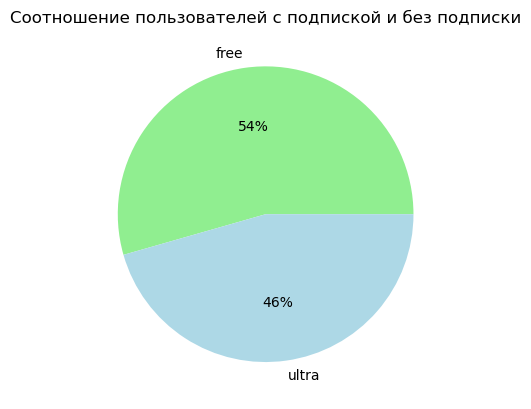

In [13]:
subscription_type_count.plot(
    kind= 'pie',
    title='Соотношение пользователей с подпиской и без подписки',
    autopct= '%.0f%%',
    ylabel= '',
    colors = ['lightgreen', 'lightblue']
)

plt.show()

### Гистограмма возрастов
Изучим распределение возрастов пользователей самокатов. Для этого построим гистограмму возрастов по полю `age`. Используем количество бинов, равное разности максимального и минимального значений возраста.

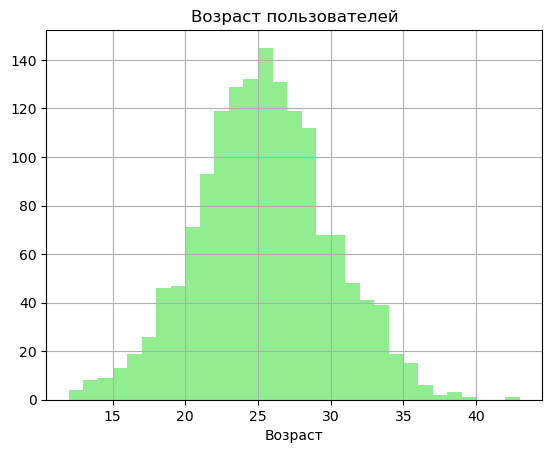

In [14]:
n_bins = df_users_go['age'].max() - df_users_go['age'].min()

df_users_go['age'].hist(bins = n_bins, color='lightgreen')
plt.title('Возраст пользователей')
plt.xlabel('Возраст')

plt.show()

### Несовершеннолетние пользователи
Рассчитаем долю несовершеннолетних (возрастом менее 18 лет) пользователей самокатов.

In [15]:
under_18 = df_users_go['user_id'][(df_users_go['age'] < 18)].count()
all_users = df_users_go.shape[0]
users_under_18_ratio = round(under_18 / all_users * 100)
print(f'Доля несовершеннолетних пользователей самокатов составляет {users_under_18_ratio}%.')

Доля несовершеннолетних пользователей самокатов составляет 5%.


### Характеристики длительности поездки
Изучим длительность поездок:

1. Расчитаем среднее значение и стандартное отклонение длительности поездки. Для расчёта стандартного отклонения воспользуемся методом `std()`.
2. Рассчитаем 25-й и 75-й процентили длительности поездки.

In [16]:
duration_mean = round(df_rides_go['duration'].mean())
duration_std = round(df_rides_go['duration'].std())

duration_pct25 = round(df_rides_go['duration'].quantile(0.25))
duration_pct75 = round(df_rides_go['duration'].quantile(0.75))

print(f'Средняя длительность поездки {duration_mean} минут со стандартным отклонением {duration_std}. Основная часть поездок занимает от {duration_pct25} до {duration_pct75} минут.')

Средняя длительность поездки 18 минут со стандартным отклонением 6. Основная часть поездок занимает от 14 до 22 минут.


## Объединение данных

### Объединение таблицы пользователей и поездок
Объединим датафреймы с информацией о пользователях `df_users_go` и поездках `df_rides_go`. Полученный датафрейм назовем просто `df`. 

In [17]:
df = df_users_go.merge(df_rides_go, on='user_id', how='left')

### Присоединение информации о подписках
Присоединим к полученному датафрейму `df` информацию о подписках из `df_subscriptions_go`.

In [18]:
df = df.merge(df_subscriptions_go, on='subscription_type', how='left')

### Отдельные датафреймы для пользователей с подпиской и без
Создадим два вспомогательных датафрейма на основе `df`: первый только для пользователей с подпиской `df_ultra` и второй только для пользователей без подписки `df_free`.

In [19]:
df_ultra = df.loc[df['subscription_type'] == 'ultra']
df_free = df.loc[df['subscription_type'] == 'free']

### Гистограмма длительности поездок для обеих групп
1. Построим гистограмму распределения длительности поездок `duration` для пользователей с подпиской (ultra) и без(free).
2. Дополнительно рассчитаем среднюю длительность поездки для пользователей с подпиской и без.

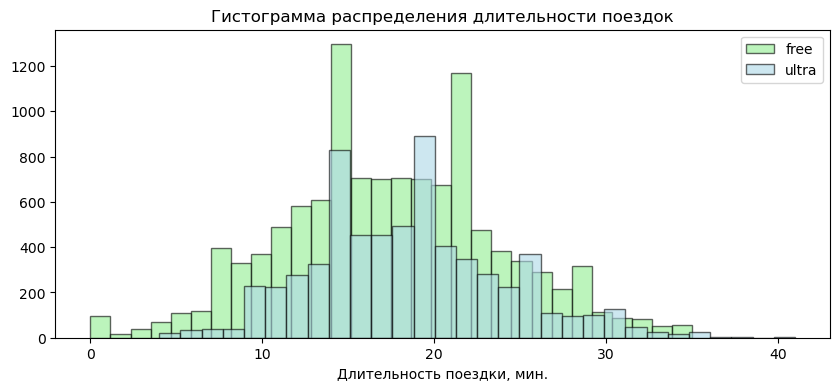

In [20]:
# Гистограмма длительности поездки для пользователей с подпиской и без
plt.figure(figsize=(10, 4))

df_free['duration'].hist(bins=30, label='free', edgecolor='black', color='lightgreen', alpha=0.6)
df_ultra['duration'].hist(bins=30, label='ultra', edgecolor='black', color='lightblue', alpha=0.6)

plt.title('Гистограмма распределения длительности поездок')
plt.xlabel('Длительность поездки, мин.')
plt.legend()
plt.grid(False)

plt.show()

In [21]:
# Расчет и вывод на экран средней длительности поездки для пользователей с подпиской и без
mean_duration_free = round(df_free['duration'].mean())
mean_duration_ultra = round(df_ultra['duration'].mean())
print(f'Средняя длительность поездки для пользователей без подписки {mean_duration_free} мин, а для пользователей с подпиской {mean_duration_ultra} мин')

Средняя длительность поездки для пользователей без подписки 17 мин, а для пользователей с подпиской 19 мин


## Подсчёт выручки
После объединения данных о количестве и длительности поездок, информации достатачно, чтобы рассчитать выручку.

### Данные сгруппированные по нужным колонкам
Сгруппируем данные по следующим столбцам: `user_id`, `name`, `subscription_type`, `month`. Группировку призводите в датафрейме `df_gp`. В итоговом датафрейме `df_gp` сохраним порядок агрегации изначальных столбцов.

In [22]:
df_gp = df.groupby(['user_id', 'name', 'subscription_type', 'month'], as_index=False)

### Задача 5.2 Подсчёт агрегированных метрик
Создадим новый датафрейм `df_agg`. В нём для каждой группы рассчитаем и добавим в датафрейм следующие агрегированные значения:
- `total_distance` — сумма значений в столбце `distance`.
- `total_duration` — сумма значений в столбце `duration`.
- `rides_count` — количество элементов в столбце `duration`.
- `subscription_type` — первое значение в группе для столбца `subscription_type`.
- `minute_price` — первое значение в группе для столбца `minute_price`.
- `start_ride_price` — первое значение в группе для столбца `start_ride_price`.
- `subscription_fee` — первое значение в группе для столбца `subscription_fee`.

In [23]:
df_agg = df_gp.agg(
    total_distance=('distance', 'sum'),
    total_duration=('duration', 'sum'),
    rides_count=('duration', 'count'),
    subscription_type=('subscription_type', 'first'),
    minute_price=('minute_price', 'first'),
    start_ride_price=('start_ride_price', 'first'),
    subscription_fee=('subscription_fee', 'first')
)

### Функция для подсчёта выручки
Создим функцию `calculate_monthly_revenue(row)` для расчёта месячной выручки по формуле:

`monthly_revenue` = `start_ride_price` * `rides_count` + `minute_price` * `total_duration` + `subscription_fee`

Где:
- `start_ride_price * rides_count` — выручка от начала каждой поездки.
- `minute_price * total_duration` — выручка за время использования.
- `subscription_fee` — фиксированная выручка от подписок.

In [24]:
def calculate_monthly_revenue(row):
    monthly_revenue = row['start_ride_price'] * row['rides_count'] + row['minute_price'] * row['total_duration'] + row['subscription_fee']
    return monthly_revenue

### Создание столбца с месячной выручкой на пользователя
Создадим новый столбец с месячной выручкой на пользователя `monthly_revenue`.

In [25]:
df_agg['monthly_revenue'] = df_agg.apply(calculate_monthly_revenue, axis=1)

### Поиск пользователя с максимальной выручкой
Исследуем полученные значения выручки. Найдем пользователя с максимальной суммарной выручкой за весь период наблюдения и выведем информацию о нем по месяцам.

In [26]:
max_user = df_agg.groupby('user_id')['monthly_revenue'].sum().sort_values(ascending=False)
max_user

user_id
1236    4926
584     4830
1063    4812
783     4780
1204    4672
        ... 
1398     688
342      668
664      656
844      648
366      614
Name: monthly_revenue, Length: 1534, dtype: int64

In [27]:
df_sorted = df_agg[df_agg['user_id'] == 1236]
print(df_sorted[['user_id', 'name', 'month', 'rides_count', 'monthly_revenue']])

      user_id       name  month  rides_count  monthly_revenue
8877     1236  Александр      1            2              228
8878     1236  Александр      2            3              614
8879     1236  Александр      3            5              762
8880     1236  Александр      4            1              202
8881     1236  Александр      5            3              574
8882     1236  Александр      6            1              282
8883     1236  Александр      7            1              290
8884     1236  Александр      8            2              452
8885     1236  Александр      9            1              122
8886     1236  Александр     10            3              430
8887     1236  Александр     11            3              494
8888     1236  Александр     12            2              476


## Проверка гипотез

### Задача 6.2 Вспомогательная функция для интерпретации результатов
Напишем вспомогательную функцию `print_stattest_results(p_value, alpha)`, которая будет интерпретировать результаты статистического теста на основе p-value и заданного уровня значимости (α-уровня). Функция должна решать, следует ли принять альтернативную гипотезу или сохранить нулевую гипотезу.

У функции два параметра:
- `p_value` (тип `float`) — значение p-value, полученное в результате выполнения статистического теста.
- `alpha` (тип `float`, необязательный, по умолчанию `alpha = 0.05`) — уровень значимости статистического теста, который используется как порог для принятия решения об отклонении нулевой гипотезы.

Вызовем функцию для `p_value = 0.0001` и `p_value = 0.1`.

In [28]:
def print_stattest_results(p_value:float, alpha:float = 0.05):
    if p_value < alpha:
        print(f'Полученное значение p_value={p_value} меньше критического уровня alpha={alpha}. Принимаем альтернативную гипотезу.')
    else:
        print(f'Полученное значение p_value={p_value} больше критического уровня alpha={alpha}. Опровергнуть нулевую гипотезу нельзя.')
print_stattest_results(p_value=0.0001)
print_stattest_results(p_value=0.1)

Полученное значение p_value=0.0001 меньше критического уровня alpha=0.05. Принимаем альтернативную гипотезу.
Полученное значение p_value=0.1 больше критического уровня alpha=0.05. Опровергнуть нулевую гипотезу нельзя.


### Задача 6.3 Длительность для пользователей с подпиской и без
Проверим, тратят ли пользователи с подпиской больше времени на поездки. Сформулируем нулевую и альтернативную гипотезы:
- Нулевая гипотеза (Н0): Среднее время поездки у пользователей с подпиской и без подписки одинаковое.
- Альтернативная гипотеза (Н1): Среднее время поездки у пользователей с подпиской больше, чем у пользователей без подписки.

In [29]:
ultra_duration = df_ultra['duration']
free_duration = df_free['duration']

results = st.ttest_ind(ultra_duration, free_duration, alternative='greater') # Укажите подходящий инструмент здесь
p_value = results.pvalue
print_stattest_results(p_value)
ultra_mean_duration = round(df_ultra['duration'].mean(), 2)
free_mean_duration = round(df_free['duration'].mean(), 2)

print(f'Средняя длительность поездки тарифа Ultra {ultra_mean_duration}')
print(f'Средняя длительность поездки тарифа Free {free_mean_duration}')

Полученное значение p_value=3.1600689435611813e-35 меньше критического уровня alpha=0.05. Принимаем альтернативную гипотезу.
Средняя длительность поездки тарифа Ultra 18.55
Средняя длительность поездки тарифа Free 17.39


### Длительность поездки: больше или меньше критического значения
Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Определим расстояние, которое проезжают пользователи с подпиской за одну поездку, меньше 3130 метров.

Сформулируем нулевую и альтернативную гипотезы:
- Нулевая гипотеза (Н0): Средняя дистанция поездки у пользователей с подпиской равна 3130 м.
- Альтернативная гипотеза (Н1): Средняя дистанция поездки у пользователей с подпиской больше 3130 м.

In [30]:
null_hypothesis = 3130
ultra_distance = df_ultra['distance']

results = st.ttest_1samp(ultra_distance, null_hypothesis, alternative='greater')
p_value = results.pvalue 
print_stattest_results(p_value)

Полученное значение p_value=0.9195368847849785 больше критического уровня alpha=0.05. Опровергнуть нулевую гипотезу нельзя.


### Задача 6.5 Прибыль от пользователей с подпиской и без
Проверим гипотезу о том, что выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

Сформулируем нулевую и альтернативную гипотезы:
- Нулевая гипотеза (Н0): Средняя месячная выручка у пользователей с подпиской и без подписки одинаковая.
- Альтернативная гипотеза (Н1): Средняя месячная выручка у пользователей с подпиской выше, чем у пользователей без подписки.

In [31]:
revenue_ultra = df_agg['monthly_revenue'][df_agg['subscription_type']=='ultra']
revenue_free = df_agg['monthly_revenue'].loc[df_agg['subscription_type']=='free'] 

results = st.ttest_ind(revenue_ultra, revenue_free, alternative='greater')
p_value = results.pvalue
print_stattest_results(p_value)

mean_revenue_ultra = round(df_agg['monthly_revenue'][df_agg['subscription_type']=='ultra'].mean()) 
mean_revenue_free = round(df_agg['monthly_revenue'][df_agg['subscription_type']=='free'].mean())

print(f'Средняя выручка подписчиков Ultra {mean_revenue_ultra} руб')
print(f'Средняя выручка подписчиков Free {mean_revenue_free} руб')

Полученное значение p_value=1.7274069878387966e-37 меньше критического уровня alpha=0.05. Принимаем альтернативную гипотезу.
Средняя выручка подписчиков Ultra 359 руб
Средняя выручка подписчиков Free 322 руб


## Распределения
Оценим долю длительных поездкок продолжительностью более 30 минут, чтобы в дальнейшем компания могла предлагать дополнительную скидку подписчикам, совершающим такие поездки. Это позволит повысить лояльность клиентов.

В данной ситуации нас интересуют возможные значения для всей генеральной совокупности. Учитывая, что у нас нет доступа ко всем данным о поездках, было решено смоделировать длительность поездки с помощью нормального распределения, используя в качестве параметров выборочное среднее и стандартное отклонение из доступных данных о поездках.

### Расчёт выборочного среднего и стандартного отклонения
1. Расчитаем среднюю длительность поездки и сохраните в переменную `mu`.
2. Вычислим стандартное отклонение длительности `duration` и сохраните в переменную `sigma`.
3. Зададим значение переменной `target_time`, равное `30`. 

In [32]:
# Вычисляем среднее значение
mu = df_ultra['duration'].mean()

# Вычисляем стандартное отклонение
sigma = df_ultra['duration'].std()

# Задаём целевое время
target_time = 30

# Делаем вывод
print(f'Средняя длительность поездки {round(mu, 1)}, стандартное отклонение {round(sigma)}.')

Средняя длительность поездки 18.5, стандартное отклонение 6.


### Вычисление значения функции распределения в точке (CDF)
Если вычислить значение функции распределения в точке, это позволит узнать вероятность того, что случайная величина примет значение меньше заданного либо равное ему. Соответственно, если мы хотим ответить на вопрос о вероятности поездки более 30 минут, потребуется использовать CDF.

1. Используем функцию `norm()` из библиотеки SciPy для создания нормального распределения с параметрами `mu` и `sigma`.
2. Применим метод `cdf()` к целевому времени `target_time` для получения вероятности того, что случайная величина будет меньше этого значения или равна ему. Полученное значение сохраните в переменную `prob`, округлив до трёх знаков после точки стандартной функцией `round()`.

In [33]:
# Вычисляем вероятность того, что случайная величина будет меньше указанного значения или равна ему

duration_norm_dist  = st.norm(mu, sigma)
prob = round(1 - duration_norm_dist.cdf(target_time), 4) # Используем CDF для нахождения накопленной вероятности

print(f'Вероятность поездки более 30 минут составляет {prob}')

Вероятность поездки более 30 минут составляет 0.02


### Вероятность для интервала (CDF)
Так как вероятность поездки более 30 минут равна 0.02. Дополнительно проверим, какой процент пользователей совершает поездки в интервале от 20 до 30 минут.

In [37]:
# Определяем границы интервала
low = 20
high = 30

# Вычисляем вероятность попадания в интервал
prob_interval = round(duration_norm_dist.cdf(high) - duration_norm_dist.cdf(low), 3)

# Выводим результат
print(f'Вероятность того, что пользователь совершит поездку длительностью от {low} до {high} минут: {prob_interval}')

Вероятность того, что пользователь совершит поездку длительностью от 20 до 30 минут: 0.377


### Определение критической дистанции поездок (PPF)
Длительные поездки могут негативно сказываться на сроке службы самоката. В связи с этим принято решение установить критическую дистанцию, превышение которой будет сопровождаться дополнительной платой. Для этого необходимо определить расстояние, которое превышается только в 10% поездок (90-й процентиль).

Для этого смоделируем распределение длительности поездок, предполагая, что оно подчиняется нормальному закону, и рассчитаем критическую дистанцию, ниже которой находится 90% всех поездок.

Для этого:
1. Рассчитайте среднюю дистанцию поездки для всех пользователей из датафрейма `df` (с подпиской и без) и сохраните в переменную `mu`.
2. Вычислите стандартное отклонение дистанции поездки `distance` и сохраните в переменную `sigma`. Для вычисления стандартного отклонения можно применить метод `std()` к столбцу датасета.
3. Задайте значение переменной `target_prob`, равное `0.90`. Эта переменная будет использоваться для последующего вычисления критической дистанции.
4. Создайте объект нормального распределения `distance_norm` с заданными значениями `mu` и `sigma`.
5. Примените к созданному нормальному распределению `distance_norm` метод `ppf()` и в качестве аргумента передайте целевую вероятность `target_prob`. Полученное значение сохраните в переменную `critical_distance`.
6. Выведите ответ, используя шаблон.

In [36]:
# Вычисляем среднее значение
mu = df['distance'].mean()

# Вычисляем стандартное отклонение
sigma = df['distance'].std()

# Вероятность, для которой хотим найти значение (90% случаев)
target_prob = 0.9

# Создаём объект нормального распределения
distance_norm = st.norm(mu, sigma)

# Рассчитываем критическую дистанцию для заданного процентиля поездок
critical_distance = distance_norm.ppf(target_prob)

print(f'{100 * target_prob} % поездок имеют дистанцию ниже критического значения {critical_distance:.2f} М.')

90.0 % поездок имеют дистанцию ниже критического значения 4501.94 М.
